In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
eps = 1e-08

In [3]:
data_str = """
dbd;occ;sand;silt;clay;log10(sshc);log10(alpha);n;thetar;thetas
1430;0.0186;0.765;0.18;0.055;-5.229881;0.095495;3.44118;0.09483;0.43098
1550;0.00812;0.614;0.093;0.293;-5.196151;0.973251;1.119181;0;0.340622
1440;0.003;0.08;0.18;0.74;-5.58977;0.130883;1.211504;0.061781;0.40862
1600;0.004;0.461;0.396;0.143;-6.151184;-0.015244;1.29061;0.050392;0.380109
1290;0.0121;0.22;0.13;0.65;-6.790386;-0.150275;1.12598;0;0.505119
1400;0.008;0.4452;0.3361;0.2187;-5.363642;-0.607567;1.518481;0.06188;0.361784
1290;0.0198;0.4614;0.388;0.1506;-5.30103;-0.535484;1.647141;0.105984;0.393689
1240;0.005;0.029;0.37;0.601;-7.300162;-1.468372;2.083127;0;0.497536
1470;0.001506;0.460362;0.381638;0.158;-5.987124;-0.126752;1.225013;0.026137;0.398055
1170;0.0094;0.05;0.15;0.8;-4.313264;1.784174;1.340961;0.281824;0.538694
1600;0.0098;0.547;0.237;0.216;-4.120272;1.186729;1.402304;0.186526;0.404372
1420;0.0055;0.56;0.145;0.295;-4.092037;1.441296;1.321526;0.152863;0.420735
1690;0.002;0.937;0.028;0.035;-5.014307;0.212881;1.837195;0.023869;0.347961
1580;0.001744;0.731798;0.134202;0.134;-4.260735;1.05219;1.204634;0;0.359655
1460;0.0051;0.282;0.608;0.11;-5.217182;-0.471468;1.456529;0.041913;0.411379
1470;0.00232;0.544;0.071;0.385;-4.732394;1.488229;1.05635;0;0.458908
1330;0.004;0.118;0.343;0.539;-5.531653;0.750728;1.094723;0.155009;0.480628
1270;0.0067;0.23;0.11;0.66;-7.936514;-0.223965;1.117922;0;0.495729
691;0.0318;0.2054;0.3506;0.444;-6.406314;1.071088;1.326984;0.186016;0.767296
1390;0.0106;0.481;0.398;0.121;-6.693476;0.108867;1.510316;0.081959;0.413266
1630;0.0113;0.81;0.06;0.13;-5.067282;0.682053;1.346028;0.009394;0.332053
1290;0.0289;0.882;0.098;0.02;-3.717191;0.512049;1.854084;0.055978;0.502859
1400;0.023;0.185;0.641;0.174;-5.149967;0.139303;1.17277;0;0.434235
1350;0.0123;0.35;0.15;0.5;-7.033424;-0.845447;1.228284;0;0.468561
1380;0.00377;0.501;0.134;0.365;-4.982754;2;1.069665;0;0.531645
1279;0.0157;0.016;0.7406;0.2434;-5.972726;0.447538;1.269673;0;0.475049
1480;0.0143;0.309;0.606;0.085;-4.780268;-0.264568;1.56375;0.032839;0.390748
1540;0.0202;0.875;0.081;0.044;-5.054388;0.218749;1.715866;0.048405;0.402096
1400;0.01;0.185;0.682;0.133;-4.917215;0.452232;1.171355;0;0.39587
740;0.0221;0.037;0.295;0.668;-6.105925;1.062796;1.038632;0;0.697805
1640;0.00638;0.704;0.063;0.233;-4.90713;1.835486;1.089003;0;0.304219
1340;0.022;0.121;0.682;0.197;-6.083546;-0.403235;1.52962;0.194125;0.422601
1520;0.009;0.153;0.683;0.164;-5.21254;0.531992;1.131491;0;0.375702
1390;0.0034;0.09;0.78;0.13;-3.854087;-0.278219;1.423791;0.047083;0.376303
1580;0.0111;0.71;0.13;0.16;-5.574786;0.111945;1.220001;0;0.328596
1370;0.012;0.62;0.12;0.26;-4.60206;0.629098;1.226061;0.049151;0.390306
1730;0.001802;0.713258;0.174743;0.112;-5.558116;0.107061;1.182642;0;0.314418
1620;0.002;0.184;0.601;0.215;-4.002614;-1.298612;3.392988;0.162189;0.386859
1720;0.0006;0.949;0.003;0.048;-5.653213;0.679234;1.933491;0.009162;0.404533
1510;0.0136;0.62;0.21;0.17;-5.380211;0.143198;1.186779;0;0.361619
1570;0.0103;0.541;0.242;0.217;-4.349926;2;1.130187;0.097816;0.445158
1512;0.004552;0.93;0.05;0.02;-4.201794;0.432631;2.440875;0.015719;0.342994
1390;0.019;0.281;0.613;0.106;-5.61261;0.020715;1.32482;0.020469;0.386222
1470;0.00174;0.388;0.094;0.518;-4.781178;0.974196;1.31896;0.166394;0.386438
1570;0.0032;0.259;0.607;0.134;-5.61845;0.153014;1.384016;0.042377;0.396961
1410;0.0077;0.898;0.074;0.028;-4.435304;0.239428;2.068439;0.028251;0.426026
1340;0.0167;0.441;0.373;0.186;-5.363642;-0.516626;1.413482;0.057883;0.347311
1380;0.0004;0.879;0.061;0.06;-5.402488;0.363884;2.532723;0.042865;0.388766
1440;0.0058;0.924;0.016;0.06;-5.180639;1.262502;1.502679;0.023018;0.462908
1390;0.002;0.063;0.575;0.362;-5.661544;-1.247107;2.861738;0.196944;0.405662
1450;0.024;0.228;0.556;0.216;-5.645892;0.130052;1.173535;0;0.415218
1620;0.0069;0.475;0.145;0.38;-4.681241;2;1.092933;0.163184;0.369163
1340;0.005;0.083;0.331;0.586;-6.636388;-1.089228;7;0.389273;0.48734
1450;0.0053;0.262;0.593;0.145;-5.262572;-0.053708;1.488786;0.05463;0.392904
1470;0.011;0.194;0.676;0.13;-5.235824;0.50672;1.201457;0.126507;0.381252
1110;0.0091;0.132;0.415;0.453;-4.371848;2;1.136054;0.243076;0.628848
1320;0.0146;0.4397;0.39;0.1703;-5.363642;-0.477714;1.346875;0.037575;0.344269
1370;0.017;0.311;0.579;0.11;-4.732828;0.282006;1.321823;0.054964;0.416817
1430;0.023;0.115;0.7;0.185;-5.436519;0.415161;1.352189;0.195345;0.4421
1740;0.018023;0.534391;0.265609;0.2;-6.237544;1.120438;1.12578;0.18011;0.373847
1390;0.0109;0.574;0.162;0.264;-4.899087;2;1.107768;0.049191;0.505552
1440;0.0054;0.109;0.706;0.185;-5.787295;0.533639;1.165332;0;0.429385
1460;0.0014;0.076;0.729;0.195;-5.173086;-0.073718;1.236909;0;0.390783
1280;0.0327;0.822;0.153;0.025;-4.199401;0.649198;1.334712;0.049981;0.516233
1490;0.025459;0.265688;0.331312;0.403;-5.799793;-0.366108;1.257756;0.16459;0.43307
1461;0.005988;0.41;0.419853;0.170147;-5.568673;-0.152209;1.281595;0.081215;0.396292
1290;0.01195;0.31;0.16;0.53;-6.936514;1.331135;1.05872;0;0.544416
1440;0.0123;0.63;0.22;0.15;-4.743389;0.76259;1.164999;0;0.390988
1460;0.0047;0.254;0.609;0.137;-5.25982;-0.175527;1.55336;0.060832;0.411498
1600;0.001686;0.986021;0.013979;0;-5.033424;0.68088;1.490534;0.000066;0.351
1600;0.0016;0.886;0.094;0.02;-4.866476;-0.007462;5.46756;0.016687;0.317642
1170;0.0129;0.22;0.14;0.64;-6.82257;-1.274932;1.286072;0;0.551744
1070;0.0199;0.139;0.47;0.391;-5.228093;2;1.090568;0.205539;0.65466
1240;0.0303;0.913;0.066;0.021;-3.761873;0.428538;2.021789;0.038834;0.486651
1140;0.0104;0.26;0.12;0.62;-7.936514;-1.173252;1.280949;0;0.542035
1150;0.00377;0.43;0.083;0.487;-4.669342;2;1.266387;0.227221;0.536364
1380;0.0121;0.72;0.12;0.16;-4.261653;0.922904;1.206405;0;0.402693
1060;0.0187;0.0253;0.3147;0.66;-6.388739;0.656559;1.714493;0.314255;0.585799
1470;0.003;0.35;0.514;0.136;-5.108305;-0.071916;1.459823;0.068355;0.375095
1330;0.0061;0.405;0.085;0.51;-5.091416;0.959586;1.072259;0;0.551676
1640;0.0115;0.545;0.228;0.227;-5.380211;1.331736;1.210495;0.151132;0.396153
790;0.042;0.04;0.378;0.582;-5.242787;0.747831;1.082466;0;0.684758
1630;0.009884;0.676299;0.202701;0.121;-5.435454;0.279812;1.224009;0;0.343569
1610;0.002326;0.589808;0.141192;0.269;-4.629018;0.241989;1.139221;0;0.337317
1600;0.0089;0.522;0.262;0.216;-3.781178;2;1.248153;0.165843;0.44594
1509;0.001744;0.96801;0.00699;0.025;-3.587431;0.594391;3.846327;0.035745;0.36222
1240;0.032;0.258;0.594;0.148;-5.117475;0.209812;1.434512;0.14889;0.453736
1580;0.005;0.6;0.12;0.28;-4.996994;0.994255;1.300353;0.163944;0.392469
1490;0.0035;0.072;0.798;0.13;-5.199003;0.301928;1.271395;0.05443;0.429324
280;0.234;0.328;0.452;0.22;-4.915324;1.618912;1.061707;0;0.857212
1600;0.00638;0.592;0.094;0.314;-4.879609;2;1.425294;0.165889;0.402605
1190;0.0112;0.07;0.18;0.75;-4.149762;1.533394;1.280303;0.281455;0.504748
1230;0.019645;0.314536;0.363464;0.322;-4.580488;0.413978;1.127247;0;0.473428
1330;0.0157;0.5182;0.3095;0.1723;-5.311201;-0.562257;1.304926;0.000698;0.323449
1710;0.0014;0.895;0.037;0.068;-5.034511;0.026044;3.577745;0.038152;0.391759
1360;0.0101;0.51;0.17;0.32;-4.362482;2;1.195599;0.082924;0.471656
1230;0.0249;0.238;0.437;0.325;-4.662125;-0.312548;1.259146;0.091388;0.495546
1400;0.0409;0.874;0.091;0.035;-4.799635;0.207329;1.731853;0.025442;0.419303
1680;0.0036;0.955;0.01;0.035;-5.446274;0.150232;2.465162;0.030083;0.308945
1250;0.006;0.081;0.347;0.572;-4.640165;0.179747;1.149364;0.16338;0.509793
1600;0.0084;0.93;0.04;0.03;-5.015348;0.155639;2.161302;0.015625;0.347469
1640;0.00348;0.565;0.112;0.323;-5.83271;2;1.18934;0.120034;0.382323
893;0.032558;0.044;0.336;0.62;-4.584911;0.756181;1.087067;0.286169;0.650417
1540;0.002849;0.47633;0.22367;0.3;-5.614294;0.599383;1.238788;0.168904;0.400758
1230;0.0087;0.34;0.15;0.51;-6.459392;-0.060783;1.398299;0.253069;0.509826
1660;0.00348;0.629;0.068;0.303;-5.344337;2;1.227474;0.129462;0.365211
1410;0.00116;0.393;0.08;0.527;-4.732394;0.838523;1.337316;0.142998;0.416902
1550;0.0153;0.477;0.398;0.125;-5.364805;-0.236294;1.228913;0;0.401016
1280;0.019;0.34;0.16;0.5;-7.237544;1.300987;1.04385;0;0.492388
1440;0.0054;0.874;0.101;0.025;-4.722306;0.307555;2.126957;0.027546;0.406613
1590;0.0156;0.72;0.08;0.2;-5.732394;0.237116;1.51278;0.147937;0.33899
1460;0.0098;0.13;0.72;0.15;-3.107789;-0.318526;1.620581;0.099692;0.40723
1400;0.0098;0.71;0.12;0.17;-4.616367;0.954481;1.207507;0;0.403768
790;0.0185;0.004;0.377;0.619;-6.246318;0.875268;1.054519;0;0.681076
823;0.0844;0.098;0.506;0.396;-4.407597;2;1.243545;0.241708;0.74719
1660;0.0129;0.52;0.36;0.12;-6.538574;-0.794317;1.365692;0.039436;0.361833
1280;0.0192;0.5764;0.271;0.1526;-5.289131;-0.179607;1.273287;0.000979;0.382598
1703;0.005814;0.98;0.02;0;-4.836143;0.13769;2.460603;0.000078;0.371967
1600;0.00405;0.6;0.105;0.295;-4.693476;2;1.109607;0.088968;0.356898
1430;0.00174;0.6;0.077;0.323;-4.698468;1.578489;1.349595;0.116596;0.439388
1570;0.0047;0.405;0.42;0.175;-5.073786;-0.634778;1.217251;0;0.356202
1580;0.0058;0.655;0.23;0.115;-6.462297;0.272728;1.451382;0.053762;0.354217
1220;0.0066;0.19;0.2;0.61;-7.635484;-1.154222;1.211528;0;0.499085
1470;0.0135;0.312;0.603;0.085;-4.308431;-0.423206;1.641859;0.032615;0.391384
1390;0.00174;0.535;0.081;0.384;-4.686094;1.71977;1.278985;0.114807;0.445179
1560;0.0132;0.75;0.05;0.2;-5.345449;0.718188;1.132169;0;0.340517
1340;0.008721;0.587208;0.276792;0.136;-5.616367;-0.201383;1.530602;0.053772;0.411018
1560;0.0183;0.62;0.16;0.22;-5.050023;-0.235109;1.216845;0;0.33009
1250;0.0129;0.39;0.12;0.49;-5.790386;0.550539;1.244852;0.149011;0.520241
1320;0.009884;0.112;0.618;0.27;-6.857332;0.357002;1.186293;0.092349;0.333359
1580;0.00116;0.576;0.091;0.333;-5.943519;0.744075;1.419736;0.144626;0.379684
1380;0.0087;0.922;0.053;0.025;-4.304056;0.623309;1.626541;0.017913;0.5022
1530;0.002907;0.598258;0.174743;0.227;-4.646479;1.335699;1.129217;0;0.422083
1460;0.00348;0.385;0.095;0.52;-5.082208;2;1.119718;0.110913;0.407661
1430;0.00116;0.459;0.096;0.445;-4.616367;0.556542;1.798685;0.159684;0.393739
1430;0.0126;0.762;0.173;0.065;-5.663976;0.291959;1.774557;0.048229;0.428416
1620;0.004302;0.814;0.098758;0.087242;-4.22051;0.477582;2.47877;0.061114;0.424847
1480;0.0003;0.642;0.135;0.223;-5.186777;0.199735;1.436128;0.0901;0.451611
1490;0.0062;0.416;0.394;0.19;-6.093905;-0.452059;1.205707;0;0.361666
1670;0.0022;0.966;0.019;0.015;-4.751539;0.193884;2.843478;0.013012;0.352215
1520;0.0079;0.544;0.329;0.127;-6.176091;0.258147;1.258352;0.040112;0.382468
1650;0.0013;0.973;0.016;0.011;-4.237978;0.340529;3.378082;0.005813;0.315894
560;0.0866;0.314;0.367;0.319;-4.778151;1.341836;1.106544;0;0.733691
1180;0.084186;0.256433;0.293567;0.45;-6.033424;1.053995;1.107005;0.274511;0.559766
1340;0.004;0.74;0.05;0.21;-4.676442;1.158453;1.136854;0;0.435268
1560;0.007;0.51;0.16;0.33;-5.790386;1.258549;1.075638;0;0.38384
1640;0.0093;0.8;0.13;0.07;-4.729688;0.518193;1.360159;0.026465;0.330247
1550;0.0127;0.531;0.236;0.233;-4.044419;2;1.287761;0.19922;0.467935
1420;0.00174;0.424;0.109;0.467;-4.857332;1.167374;1.320082;0.160011;0.42294
1570;0.0127;0.128;0.752;0.12;-5.808438;-0.219301;1.426413;0.084573;0.39446
1680;0.0032;0.855;0.09;0.055;-5.821569;0.114048;1.939981;0.039974;0.313125
1250;0.0095;0.355;0.489;0.156;-4.5714;0.146205;1.170294;0.028809;0.524277
1340;0.00174;0.388;0.103;0.509;-4.584331;0.258966;3.661357;0.195288;0.417276
1460;0.0244;0.816;0.132;0.052;-5.136484;-0.00239;1.583891;0.038038;0.395502
1450;0.0008;0.969;0.011;0.02;-4.009811;0.8172;2.190244;0.0172;0.477318
1211;0.0092;0.0176;0.8524;0.13;-6.050023;0.726032;1.268523;0;0.495415
1440;0.0039;0.313;0.319;0.368;-5.179118;1.931836;1.05436;0;0.511809
1290;0.0127;0.25;0.15;0.6;-7.635484;-0.207079;1.136562;0;0.504221
1355;0.0061;0.013;0.7825;0.2045;-6.273756;0.443348;1.225621;0;0.461344
1500;0.0096;0.7;0.16;0.14;-4.945288;0.487954;1.287406;0;0.369944
1490;0.0144;0.927;0.058;0.015;-4.937949;0.321513;1.903471;0.031647;0.389354
1500;0.00495;0.64;0.06;0.3;-4.474116;1.123058;1.093173;0;0.372749
1380;0.00174;0.338;0.073;0.589;-4.895121;0.344551;1.894173;0.204702;0.410538
1300;0.0059;0.33;0.17;0.5;-7.635484;0.317297;1.078224;0;0.484658
1480;0.00174;0.4;0.083;0.517;-5.174586;1.051056;1.286067;0.152724;0.413287
1500;0.0147;0.59;0.26;0.15;-5.264416;0.234502;1.213756;0;0.392909
1290;0.0061;0.013;0.7825;0.2045;-7.459392;0.337816;1.194169;0.0607;0.497616
1330;0.0081;0.21;0.16;0.63;-7.459392;-1.039929;1.233078;0;0.482783
980;0.0368;0.388;0.113;0.499;-3.735117;1.523263;1.508895;0.274371;0.646256
1610;0.0056;0.948;0.027;0.025;-5.388739;0.231241;2.284921;0.020868;0.346252
1510;0.013372;0.684309;0.209691;0.106;-4.915324;0.427883;1.22361;0;0.378441
1390;0.005;0.062;0.354;0.584;-4.966576;1.293795;1.033748;0;0.470349
1400;0.022384;0.021;0.525581;0.453419;-5.646479;0.400955;1.199856;0;0.423797
1530;0.0029;0.118;0.697;0.185;-7.158362;0.241016;1.206286;0;0.408992
1390;0.002;0.103;0.304;0.593;-5.790485;-1.177102;3.392328;0.348445;0.452873
1710;0.002;0.252;0.597;0.151;-6.014574;0.454536;1.456823;0.153904;0.32609
1480;0.00365;0.51;0.1;0.39;-4.547348;1.683117;1.060503;0;0.388204
1330;0.002;0.065;0.468;0.467;-4.774691;0.132487;1.091569;0;0.477887
1050;0.00419;0.1795;0.13;0.6905;-6.497181;1.313393;1.637159;0.28201;0.598686
1470;0.00168;0.62;0.056;0.324;-4.963848;2;1.234737;0.145193;0.444635
1360;0.0159;0.396;0.38;0.224;-5.40122;-0.488494;1.353111;0.036754;0.354098
1320;0.0184;0.852;0.113;0.035;-4.605613;0.22594;2.262542;0.074896;0.431192
790;0.0455;0.475;0.123;0.402;-3.346564;2;1.434345;0.244295;0.765272
810;0.0116;0.018;0.237;0.745;-4.545579;1.385865;1.0428;0;0.702564
1430;0.003;0.1;0.55;0.35;-4.943095;-0.928749;1.151402;0;0.399747
1640;0.0034;0.53;0.26;0.21;-7.635484;-0.144996;1.101512;0;0.378567
1498;0.0128;0.42;0.14;0.44;-7.459392;-1.152293;1.257617;0;0.408376
1420;0.025;0.237;0.567;0.196;-5.446117;0.513855;1.153769;0;0.405597
1388;0.0323;0.0219;0.8067;0.1714;-7.091416;0.216431;1.407156;0.039569;0.45192
1410;0.002;0.075;0.482;0.443;-5.645892;-1.133263;4.456497;0.310837;0.442071
1670;0.0104;0.514;0.244;0.242;-6.255273;2;1.140155;0.097179;0.414365
1570;0.021;0.323;0.567;0.11;-4.197733;-0.43925;1.97634;0.084884;0.390192
1410;0.002;0.156;0.508;0.336;-5.271646;-1.249744;2.855959;0.165369;0.40033
1200;0.0084;0.45;0.1;0.45;-5.790386;-0.093356;1.52115;0.23908;0.486552
1560;0.0011;0.97;0;0.03;-4.017017;0.536156;2.691091;0.012108;0.358717
1120;0.01;0.078;0.364;0.558;-4.639849;2;1.118117;0.161271;0.606685
1250;0.0125;0;0.37;0.63;-7.334454;-1.084968;1.1126;0;0.55429
1570;0.0038;0.615;0.09;0.295;-5.474116;0.826807;1.072696;0;0.370605
1530;0.014535;0.779808;0.141192;0.079;-4.766252;-0.029093;1.303426;0;0.369095
1480;0.0036;0.63;0.05;0.32;-5.681241;0.670549;1.084226;0;0.400625
457;0.0238;0.2103;0.4912;0.2985;-6.359022;1.171805;1.370446;0.141018;0.850307
1730;0.00385;0.715;0.08;0.205;-5.556303;2;1.080242;0.078973;0.300613
1420;0.018;0.917;0.068;0.015;-4.97103;0.488418;1.964031;0.041786;0.429972
1060;0.0171;0.074;0.514;0.412;-4.182931;2;1.263518;0.287362;0.676455
1250;0.014535;0.010618;0.419382;0.57;-6.635484;-0.349651;1.083484;0;0.551307
1280;0.00174;0.344;0.128;0.528;-4.669342;0.183851;5.4536;0.195108;0.445056
880;0.00556;0.2114;0.1266;0.662;-6.50515;1.228206;1.391627;0.277928;0.681203
1110;0.0055;0.092;0.539;0.369;-4.338819;2;1.162773;0.197957;0.625052
1460;0.006;0.115;0.74;0.145;-6.190659;0.017984;1.427537;0.08227;0.400868
1320;0.0095;0.4;0.11;0.49;-7.158362;0.030375;1.766437;0.273451;0.464783
1590;0.0019;0.856;0.034;0.11;-6.301332;0.131523;1.588737;0.047475;0.411902
1650;0.002;0.142;0.652;0.206;-3.853872;-1.641509;1.846218;0;0.328117
1400;0.008;0.239;0.63;0.131;-4.703335;0.579291;1.255838;0.090246;0.393642
1670;0.0025;0.94;0.01;0.05;-4.895121;0.335523;4.208581;0.124976;0.310002
1500;0.029;0.82;0.125;0.055;-5.178359;0.155987;1.552092;0.058874;0.390622
1120;0.0087;0.36;0.15;0.49;-5.936514;-0.641739;1.197564;0;0.492517
1520;0.00232;0.48;0.074;0.446;-5.198526;0.799194;1.377501;0.163331;0.370679
1440;0.0131;0.552;0.258;0.19;-3.61845;2;1.327752;0.170477;0.573178
1440;0.021;0.52;0.18;0.3;-5.82257;0.6405;1.136987;0;0.428751
1540;0.00174;0.497;0.078;0.425;-5.653213;1.298629;1.217133;0.125614;0.365618
800;0.04;0.1388;0.2587;0.6025;-6.376607;1.6118;1.280529;0.19864;0.741559
1330;0.006;0.083;0.339;0.578;-5.563837;-1.10109;4.91268;0.336713;0.474058
1489;0.012209;0.772818;0.148182;0.079;-4.91948;0.374957;1.296643;0;0.400601
1334;0.002733;0.6;0.251239;0.148761;-5.778151;-0.405877;1.507184;0.100322;0.423885
1480;0.0089;0.62;0.13;0.25;-4.793499;1.349648;1.22149;0.078656;0.398607
1510;0.0091;0.415;0.45;0.135;-5.843092;-0.803781;1.268825;0;0.35776
1170;0.00318;0.1855;0.1085;0.706;-6.49091;1.457364;1.414532;0.289994;0.581138
1080;0.00441;0.225;0.201;0.574;-4.850154;2;1.172431;0.322297;0.627503
1610;0.0105;0.76;0.07;0.17;-6.079181;0.252826;1.455489;0.187003;0.34983
1540;0.0039;0.078;0.722;0.2;-6.090177;-0.055437;1.197221;0.018584;0.395032
1460;0.02;0.254;0.508;0.238;-4.484126;0.605483;1.314341;0.222891;0.4064
1390;0.0121;0.78;0.095;0.125;-4.397438;0.919033;1.668684;0.054403;0.457544
1500;0.023052;0.225301;0.339699;0.435;-6.706065;-0.38688;1.111186;0;0.446796
1100;0.012;0.22;0.15;0.63;-7.936514;-1.590492;1.433374;0;0.560817
1570;0.0101;0.529;0.255;0.216;-4.083424;2;1.203703;0.174056;0.482416
1660;0.001;0.176;0.579;0.245;-4.385103;-0.753764;1.172393;0.196123;0.32918
987;0.0323;0.0219;0.8067;0.1714;-5.097036;1.298407;1.18582;0;0.609935
1390;0.00143;0.2266;0.1204;0.653;-6.559937;1.128565;1.06087;0;0.481309
1580;0.0034;0.4;0.475;0.125;-5.317316;0.035547;1.398908;0.045101;0.391514
1560;0.00174;0.523;0.072;0.405;-5.626884;2;1.089378;0.022396;0.38367
1410;0.002;0.086;0.345;0.569;-7.943095;-1.148441;2.914194;0.346284;0.487833
1590;0.00184;0.5039;0.0751;0.421;-6.455071;0.687949;1.453641;0.229336;0.405377
1240;0.0258;0.141;0.351;0.508;-3.507246;-0.746047;1.257215;0.131197;0.520479
1350;0.0224;0.867;0.098;0.035;-4.304664;0.339415;1.616978;0.047046;0.429456
1480;0.0033;0.268;0.637;0.095;-4.719557;-0.149986;1.275623;0.009038;0.414696
1560;0.0157;0.58;0.18;0.24;-5.635484;0.819525;1.127937;0;0.341256
1700;0.0029;0.715;0.053;0.232;-5.246318;2;1.21623;0.087402;0.372851
1800;0.018605;0.486536;0.363464;0.15;-5.936514;1.687283;1.081864;0.069987;0.33068
1470;0.0095;0.62;0.12;0.26;-4.992031;1.005316;1.321974;0.127654;0.383072
1550;0.0131;0.72;0.13;0.15;-4.963386;0.526928;1.3261;0.114458;0.369522
1590;0.001744;0.618462;0.177538;0.204;-4.954695;0.404535;1.154937;0;0.35714
1460;0.0161;0.53;0.219;0.251;-5.093905;1.101374;1.471359;0.249458;0.493694
1440;0.013953;0.650156;0.241844;0.108;-4.431364;1.027901;1.227332;0;0.450335
1100;0.0029;0.04;0.26;0.7;-4.416686;0.63603;1.648394;0.241555;0.564047
1660;0.00754;0.709;0.12;0.171;-5.251668;2;1.111183;0;0.37045
1350;0.011;0.192;0.689;0.119;-4.721246;0.317705;1.216457;0;0.40939
1280;0.0133;0.54;0.17;0.29;-4.061452;2;1.249874;0.108275;0.511688
1330;0.0189;0.423;0.382;0.195;-5.287179;-0.576513;1.818973;0.12328;0.395198
1600;0.0027;0.288;0.5;0.212;-4.38154;0.107694;1.163312;0;0.389876
1540;0.005512;0.43034;0.23066;0.339;-6.706065;-0.565052;1.379828;0.2081;0.407108
1390;0.007;0.4478;0.1637;0.3885;-6.474116;1.54298;1.101767;0;0.479931
1390;0.0189;0.516;0.296;0.188;-3.846609;0.737523;1.936597;0.251396;0.54063
1100;0.0196;0.266;0.365;0.369;-4.524894;2;1.184567;0.270309;0.643498
1410;0.0083;0.4324;0.3362;0.2314;-5.388739;-0.713927;1.865588;0.099933;0.336052
1380;0.015;0.6;0.17;0.23;-4.460843;0.845408;1.182243;0;0.441657
1610;0.015;0.72;0.12;0.16;-4.056845;1.01397;1.630984;0.200008;0.34134
610;0.066;0.213;0.425;0.362;-4.853728;0.853126;1.127709;0;0.730344
1090;0.0061;0.3;0.115;0.585;-5.1236;1.553783;1.073014;0;0.601325
1760;0.001163;0.7614;0.1356;0.103;-5.124269;0.152395;1.24548;0;0.273505
1490;0.00174;0.414;0.109;0.477;-4.695964;0.637239;1.543894;0.18873;0.396211
1490;0.0041;0.396;0.414;0.19;-4.746154;-0.892608;1.248819;0;0.343231
1000;0.0311;0.06;0.505;0.435;-4.154758;2;1.178454;0.265856;0.69189
1280;0.0192;0.5089;0.1491;0.342;-6.389971;1.372584;1.122009;0;0.530927
910;0.0356;0.1;0.2;0.7;-3.539617;2;1.40164;0.234412;0.695961
1570;0.0037;0.62;0.09;0.29;-4.968031;0.781288;1.073622;0;0.359793
1570;0.0091;0.133;0.747;0.12;-6.110439;-0.744625;2.107217;0.098213;0.38665
1270;0.00535;0.465;0.155;0.38;-5.82257;1.23069;1.045579;0;0.462035
1450;0.0127;0.086;0.794;0.12;-5.695964;-0.192287;1.341117;0.048635;0.399631
1130;0.0067;0.308;0.282;0.41;-4.80618;2;1.147308;0.23115;0.635263
1260;0.0325;0.855;0.12;0.025;-4.946353;0.374402;1.917234;0.065049;0.432118
1570;0.0249;0.43;0.35;0.22;-4.65548;-0.764632;1.422444;0;0.338963
1426;0.0157;0.016;0.7406;0.2434;-6.614294;0.014537;1.331943;0.019028;0.425532
1368;0.0061;0.013;0.7825;0.2045;-7.936514;-0.081121;1.468518;0.140892;0.459396
1550;0.0046;0.252;0.638;0.11;-4.98727;-0.120252;1.429842;0.044416;0.389281
1360;0.0223;0.165;0.715;0.12;-5.710946;-0.365778;1.544166;0.06305;0.398407
1660;0.0111;0.177;0.693;0.13;-5.778151;-0.310631;1.223678;0;0.356416
1530;0.0065;0.78;0.14;0.08;-5.445152;0.185223;1.573628;0.040487;0.405938
1460;0.0137;0.527;0.268;0.205;-4.518212;0.827661;1.79344;0.22131;0.511089
1070;0.0106;0.295;0.295;0.41;-4.582405;2;1.144737;0.221559;0.613798
1550;0.0012;0.571;0.339;0.09;-6.90309;0.471456;1.205286;0;0.40775
1320;0.0196;0.5035;0.3295;0.167;-5.315337;-0.609082;1.326705;0;0.313698
1120;0.0173;0.293;0.421;0.286;-4.408884;2;1.152373;0.205952;0.626975
1480;0.00459;0.4207;0.1463;0.433;-6.419318;0.798493;1.297426;0.21474;0.460306
1500;0.0044;0.182;0.688;0.13;-4.599154;0.057682;1.385041;0.050757;0.386178
1560;0.00406;0.482;0.1;0.418;-5.82257;1.810789;1.068572;0;0.35595
1450;0.0096;0.091;0.774;0.135;-5.966632;0.041738;1.226295;0;0.410077
1450;0.0083;0.19;0.46;0.35;-4.850154;1.280112;1.101069;0;0.475997
1380;0.002;0.172;0.269;0.559;-5.899629;-1.03565;1.772832;0.349832;0.483739
1410;0.0106;0.58;0.14;0.28;-4.695964;1.238187;1.127618;0;0.395454
1150;0.0132;0.357;0.317;0.326;-4.375412;2;1.113635;0.231902;0.600029
1130;0.0094;0.212;0.462;0.326;-5.024824;2;1.121128;0.206145;0.629566
1320;0.022;0.194;0.633;0.173;-5.232102;0.436531;1.267469;0.161169;0.447991
1490;0.0162;0.321;0.566;0.113;-3.896307;-0.413793;1.688309;0.043811;0.385457
820;0.045;0.11;0.18;0.71;-3.644258;2;1.413548;0.257965;0.688757
724;0.032558;0.044;0.336;0.62;-4.462152;0.998501;1.116639;0.232012;0.689811
1260;0.0073;0.75;0.07;0.18;-5.345449;0.499435;1.377149;0.118038;0.451121
1590;0.00226;0.606;0.07;0.324;-5.385064;2;1.164344;0.152673;0.403393
1280;0.0168;0.54;0.2853;0.1747;-5.306086;-0.566603;1.323504;0.001324;0.319397
1510;0.0025;0.078;0.807;0.115;-4.791007;-0.160734;1.260215;0.005882;0.39866
1660;0.001;0.173;0.593;0.234;-6.636388;-1.117241;4.70572;0.200755;0.34307
1450;0.012;0.144;0.697;0.159;-5.007005;0.782909;1.117312;0;0.385613
1340;0.005;0.31;0.14;0.55;-7.334454;2;1.154341;0.353378;0.501473
1360;0.0062;0.565;0.268;0.167;-5.538747;-0.145289;2.518002;0.117601;0.438448
1560;0.0087;0.807;0.07;0.123;-4.988101;0.9454;1.636391;0.053291;0.41684
1630;0.003;0.194;0.647;0.159;-7.087778;-0.519746;1.399952;0.089164;0.356177
1360;0.0109;0.468;0.3486;0.1834;-5.377805;-0.490478;1.312441;0;0.369575
1500;0.0028;0.208;0.677;0.115;-4.839256;-0.680333;1.94385;0.082187;0.39478
1620;0.007215;0.599982;0.334018;0.066;-4.205731;0.507481;1.268958;0;0.335644
1490;0.0063;0.283;0.612;0.105;-4.765431;0.130745;1.485872;0.049239;0.377385
1550;0.0028;0.85;0.04;0.11;-5.237544;0.606331;1.078865;0;0.368804
1520;0.0034;0.46;0.105;0.435;-5.002015;1.640911;1.073597;0;0.368517
1480;0.0132;0.55;0.335;0.115;-4.099115;-0.820369;1.651405;0.087876;0.388617
1540;0.0158;0.25;0.65;0.1;-4.291386;-0.524327;1.508801;0.039348;0.389523
1430;0.0083;0.339;0.533;0.128;-5.071884;0.048992;1.373247;0.047785;0.398203
457;0.013;0.1455;0.428;0.4265;-6.423296;1.265151;1.347093;0.129381;0.854855
1450;0.0092;0.091;0.774;0.135;-5.571026;0.090782;1.305221;0.049435;0.430622
1400;0.0108;0.915;0.045;0.04;-4.427849;0.556231;1.697431;0.028796;0.496481
1490;0.0146;0.19;0.685;0.125;-7.32373;-0.429687;1.516807;0.077251;0.398021
1500;0.0039;0.242;0.618;0.14;-4.743389;-0.5142;1.67148;0.054592;0.402119
1640;0.0163;0.531;0.359;0.11;-6.614294;-0.9233;1.315843;0;0.350223
1361;0.006221;0.45;0.315546;0.234454;-5.826126;0.335496;1.457017;0.144992;0.434587
1540;0.0011;0.969;0.016;0.015;-4.212894;0.478904;2.306288;0.005998;0.36957
632;0.0303;0.2008;0.2907;0.5085;-6.393688;1.373375;1.43462;0.208202;0.787458
1650;0.0087;0.491;0.241;0.268;-5.109144;1.994266;1.216605;0.151413;0.420971
1480;0.019;0.271;0.592;0.137;-4.4698;0.834747;1.173735;0;0.4414
520;0.0731;0.291;0.326;0.383;-4.466692;1.477022;1.202764;0.281733;0.770018
1430;0.0092;0.0176;0.8524;0.13;-6.556303;0.200645;1.339451;0.034892;0.443344
1470;0.0054;0.069;0.751;0.18;-5.028834;-0.547159;1.468113;0.068755;0.405118
1230;0.00595;0.33;0.09;0.58;-5.614294;0.793762;1.193913;0.198079;0.541718
1520;0.00565;0.57;0.22;0.21;-5.212238;0.718763;1.117926;0;0.399829
1310;0.00765;0.75;0.07;0.18;-4.207349;2;1.243775;0.201214;0.509033
1520;0.0051;0.684;0.231;0.085;-5.468166;0.11198;2.445388;0.089769;0.397879
1130;0.002;0.0149;0.0651;0.92;-6.489356;0.749539;1.717738;0.360219;0.553336
1560;0.00232;0.47;0.113;0.417;-5.737857;2;1.118622;0.111014;0.381075
1610;0.003;0.16;0.565;0.275;-5.761954;0.147247;2.027472;0.274602;0.374386
1400;0.0098;0.36;0.15;0.49;-7.936514;-1.189064;1.244149;0;0.458367
1389;0.0157;0.016;0.7406;0.2434;-6.936514;0.630269;1.147792;0;0.457764
630;0.0627;0.17;0.468;0.362;-4.969903;0.679631;1.142165;0.018136;0.720999
1690;0.0137;0.62;0.23;0.15;-5.418;0.328999;1.218222;0;0.335321
1590;0.0072;0.515;0.44;0.045;-6.763327;-0.196881;1.716254;0.01876;0.354331
1770;0.0008;0.952;0.038;0.01;-5.019008;0.254635;2.75122;0.00575;0.2959
1590;0.0111;0.538;0.273;0.189;-5.653213;1.999972;1.23274;0.172427;0.443127
1200;0.0063;0.129;0.375;0.496;-5.82257;2;1.046637;0;0.586384
1480;0.0101;0.415;0.454;0.131;-5.451503;0.429829;1.284147;0.028112;0.412983
1700;0.00638;0.628;0.11;0.262;-5.341018;1.76381;1.086977;0;0.330341
1580;0.0157;0.52;0.35;0.13;-5.474116;-0.604117;1.445837;0;0.351816
1700;0.00464;0.564;0.102;0.334;-6.012234;1.744269;1.070068;0;0.325963
1630;0.0023;0.912;0.022;0.066;-5.237544;1.092061;1.566834;0.039527;0.380546
1660;0.006919;0.599982;0.334018;0.066;-4.460843;0.705736;1.266971;0;0.338218
1710;0.002;0.168;0.581;0.251;-6.356547;-1.155069;4.746021;0.221888;0.340713
1578;0.0092;0.0176;0.8524;0.13;-7.033424;0.187842;1.300739;0.00489;0.394607
1450;0.004;0.161;0.36;0.479;-5.365523;-1.080997;7;0.311311;0.43208
1520;0.0142;0.75;0.07;0.18;-4.737857;1.608124;1.093158;0;0.379922
1620;0.001163;0.612697;0.201303;0.186;-5.23065;0.096406;1.1767;0;0.339199
1610;0.0009;0.87;0.01;0.12;-4.763327;0.397311;2.879054;0.099482;0.340041
1730;0.0002;0.963;0.012;0.025;-4.966632;-0.119321;2.679184;0.011202;0.299688
1620;0.0056;0.649;0.235;0.116;-6.202514;0.119122;1.490762;0.075155;0.363257
1380;0.020948;0.743064;0.178936;0.078;-5.556303;-0.42625;1.298014;0;0.360019
670;0.0565;0.0195;0.1495;0.831;-6.412767;2;1.389991;0.275145;0.789789
1370;0.0078;0.32;0.15;0.53;-8.091416;1.477962;1.037281;0;0.493998
1500;0.0026;0.555;0.285;0.16;-5.711204;0.418368;1.268773;0.04562;0.43042
1630;0.0046;0.535;0.145;0.32;-5.635484;0.59968;1.095909;0;0.359483
1530;0.0174;0.22;0.14;0.64;-5.538574;0.567575;1.071603;0;0.396929
1460;0.003;0.109;0.573;0.318;-4.982967;0.020425;1.086025;0;0.3992
1530;0.0046;0.244;0.586;0.17;-4.848023;-0.505688;1.375037;0.030138;0.411286
1080;0.0076;0.016;0.166;0.818;-4.184465;2;1.074473;0.127776;0.654572
1630;0.0001;0.978;0.002;0.02;-3.991636;0.499987;2.522547;0.002202;0.339986
1420;0.028256;0.228474;0.321526;0.45;-6.237544;0.326893;1.072445;0;0.493529
1560;0.0023;0.934;0.011;0.055;-5.648712;0.562584;1.798051;0.0216;0.410465
1230;0.0224;0.6232;0.2278;0.149;-5.266268;-0.371739;1.45751;0.072718;0.375011
1480;0.002;0.228;0.629;0.143;-6.170696;-0.417573;1.329834;0;0.419548
1130;0.0029;0.05;0.26;0.69;-3.82257;0.909805;1.484143;0.261404;0.546199
1590;0.002;0.278;0.568;0.154;-6.565431;-1.38761;1.588355;0;0.349255
1420;0.021;0.133;0.722;0.145;-5.128427;-0.61546;1.24318;0;0.394796
1450;0.0049;0.495;0.125;0.38;-6.033424;2;1.043892;0;0.420044
1670;0.0109;0.62;0.24;0.14;-4.598057;0.274005;1.24351;0;0.334811
1396;0.0061;0.013;0.7825;0.2045;-6.635484;-0.186507;1.697463;0.134296;0.433881
1650;0.0085;0.79;0.06;0.15;-4.977472;0.59881;1.183316;0;0.320284
1290;0.0075;0.25;0.12;0.63;-7.237544;-0.431799;1.144148;0;0.502868
1370;0.0102;0.477;0.3202;0.2028;-5.35445;-0.398711;1.292277;0;0.363456
1670;0.00696;0.732;0.087;0.181;-4.796635;2;1.172358;0.048024;0.370099
1270;0.0179;0.5232;0.31;0.1668;-5.294049;-0.513736;1.303539;0.004632;0.320835
780;0.0324;0.025;0.311;0.664;-6.25982;1.494072;1.038635;0;0.68631
782;0.0357;0.1389;0.1161;0.745;-6.407597;2;1.28334;0.233906;0.777591
1690;0.0056;0.79;0.07;0.14;-4.945288;1.129028;1.244329;0.051485;0.303969
905;0.0199;0.138;0.431;0.431;-5.208972;2;1.267985;0.272437;0.715154
1400;0.00174;0.409;0.124;0.467;-4.936514;0.853167;1.42481;0.161032;0.411977
1580;0.0014;0.951;0.029;0.02;-4.633534;0.17272;2.966479;0.016402;0.340597
1400;0.009;0.191;0.67;0.139;-4.226945;0.772574;1.180706;0;0.424776
1470;0.029;0.29;0.16;0.55;-5.65776;0.914522;1.11804;0.039895;0.432131
1620;0.018;0.66;0.16;0.18;-5.144122;0.752574;1.263301;0.110477;0.330497
1460;0.012;0.133;0.757;0.11;-5.137656;-0.153484;1.425796;0.064532;0.415367
1460;0.002308;0.488789;0.264211;0.247;-4.296032;0.231288;1.127739;0;0.399511
850;0.0124;0.025;0.231;0.744;-5.297027;1.130991;1.045358;0;0.694686
1100;0.031686;0.300309;0.209691;0.49;-4.996994;0.657659;1.160856;0.203799;0.509787
900;0.0376;0.09;0.24;0.67;-4.168616;1.540128;1.435919;0.258089;0.607349
1580;0.009302;0.712645;0.166355;0.121;-4.475616;0.508707;1.213471;0;0.369082
1590;0.003;0.114;0.601;0.285;-6.568636;-0.012047;1.091915;0;0.349014
1420;0.002;0.102;0.367;0.531;-5.59346;-1.108421;7;0.343712;0.470528
1050;0.0329;0.371;0.176;0.453;-4.561765;2;1.076151;0.020747;0.61955
1420;0.008;0.242;0.62;0.138;-4.649752;0.113324;1.229037;0;0.397004
1330;0.0114;0.6;0.19;0.21;-4.336631;0.908309;1.181018;0;0.432384
1450;0.0161;0.191;0.69;0.119;-6.346564;0.206561;1.319517;0.047838;0.421341
1450;0.0035;0.543;0.302;0.155;-4.822671;0.048854;1.21402;0;0.414597
1450;0.007791;0.83;0.085065;0.084935;-4.180639;0.626903;2.011547;0.05102;0.483228
1730;0.0012;0.946;0.005;0.049;-5.695964;1.091318;1.620163;0.015481;0.367438
1600;0.002;0.905;0.075;0.02;-4.835799;0.160381;2.107661;0.016664;0.324646
1560;0.012;0.166;0.703;0.131;-6.278189;-0.489464;1.124052;0;0.379726
1300;0.0278;0.227;0.442;0.331;-3.708113;-0.365556;1.300289;0.116198;0.494118
1330;0.012;0.209;0.692;0.099;-4.642065;0.551357;1.207305;0;0.448632
1460;0.0073;0.61;0.22;0.17;-5.144122;0.453598;1.284771;0.130706;0.399298
940;0.0249;0.06;0.21;0.73;-3.65548;2;1.333813;0.257735;0.666673
1580;0.0219;0.872;0.082;0.046;-4.998996;-0.052617;1.712127;0.039564;0.372734
1350;0.026;0.269;0.605;0.126;-5.427128;0.135166;1.205472;0;0.417708
1090;0.0028;0.04;0.27;0.69;-4.051153;0.820095;1.590737;0.249412;0.57062
1620;0.0184;0.73;0.13;0.14;-4.729688;0.471739;1.258164;0;0.320009
1380;0.003;0.072;0.306;0.622;-5.489455;0.290087;1.551861;0.393464;0.46646
1360;0.0146;0.64;0.15;0.21;-4.569158;1.169249;1.165216;0;0.446143
1210;0.0063;0.06;0.07;0.87;-3.813643;1.43351;1.405674;0.282248;0.522049
1160;0.022;0.126;0.689;0.185;-4.818156;0.352354;1.177289;0;0.4914
1400;0.022;0.157;0.628;0.215;-5.665546;0.186701;1.147027;0;0.420695
1490;0.002;0.205;0.468;0.327;-4.114639;0.827889;1.07703;0;0.40678
1280;0.026;0.194;0.615;0.191;-5.018634;0.078365;1.166701;0;0.438507
1200;0.006;0.05;0.09;0.86;-3.91948;1.082236;1.49454;0.272475;0.515333
1460;0.025;0.88;0.08;0.04;-6.419318;0.009529;1.840135;0.045064;0.398366
1390;0.0425;0.406639;0.433361;0.16;-6.936514;0.950815;1.067442;0.057671;0.488
1510;0.0041;0.317;0.583;0.1;-5.509352;0.143553;1.473174;0.046414;0.378719
1170;0.0098;0.041;0.355;0.604;-4.65548;2;1.052825;0.042583;0.606769
1416;0.0157;0.016;0.7406;0.2434;-7.635484;-0.02746;1.370005;0.119744;0.443674
751;0.032558;0.044;0.336;0.62;-4.883435;1.003275;1.101736;0.240664;0.677617
1610;0.004;0.59;0.12;0.29;-5.594091;1.971305;1.052854;0;0.351486
1240;0.006;0.081;0.446;0.473;-6.638272;-0.949264;3.437798;0.307759;0.478756
1610;0.0019;0.295;0.566;0.139;-5.237544;-0.22941;1.59228;0.079174;0.370578
1550;0.011047;0.665136;0.227864;0.107;-4.923677;0.45249;1.245809;0;0.366217
1170;0.0042;0.05;0.18;0.77;-4.019534;0.775329;1.587292;0.252159;0.531187
1750;0.001506;0.547472;0.184528;0.268;-5.558116;0.217347;1.11266;0;0.344697
1560;0.001;0.978;0.012;0.01;-3.545049;0.693492;2.77582;0.008118;0.377393
1000;0.0085;0.0284;0.1016;0.87;-6.480148;1.191979;1.687364;0.267625;0.600741
1190;0.0105;0.044;0.48;0.476;-4.53684;2;1.168003;0.210639;0.609175
1390;0.0045;0.524;0.326;0.15;-5.373626;0.049287;1.810973;0.105426;0.455755
1350;0.0195;0.548;0.258;0.194;-4.037789;1.839137;1.326382;0.200742;0.57106
1430;0.0163;0.13;0.725;0.145;-4.453497;-0.534304;1.42422;0.045475;0.40135
1490;0.002;0.116;0.492;0.392;-6.333482;0.035714;1.536533;0.266916;0.395838
1380;0.0369;0.88;0.085;0.035;-4.705299;0.260566;1.656165;0.025073;0.42906
1470;0.0031;0.1;0.74;0.16;-3.997294;-0.447956;1.46638;0.059389;0.385921
1440;0.00116;0.328;0.08;0.592;-4.691001;0.904294;1.222287;0.163479;0.399289
1360;0.0216;0.886;0.079;0.035;-4.259272;0.307222;1.70022;0.067403;0.426123
1190;0.0129;0.108;0.373;0.519;-5.160539;-1.018124;2.04825;0.293167;0.557015
1490;0.002;0.054;0.547;0.399;-4.336299;-0.391477;1.084088;0;0.391618
1630;0.0119;0.542;0.238;0.22;-4.923677;1.381894;1.212442;0.146083;0.376591
1030;0.0138;0.0273;0.2322;0.7405;-6.468166;1.473;1.313658;0.287914;0.62013
1200;0.0037;0.07;0.21;0.72;-3.996496;0.888272;1.636303;0.276521;0.521474
1680;0.0074;0.48;0.35;0.17;-5.405035;1.155474;1.058148;0;0.371199
1330;0.0067;0.31;0.14;0.55;-6.936514;-0.517859;1.086658;0;0.463101
1470;0.017;0.225;0.57;0.205;-5.67162;0.28702;1.278309;0.165219;0.40576
1410;0.0099;0.114;0.706;0.18;-6.120272;-0.111388;1.394325;0.045537;0.432666
1360;0.00232;0.443;0.081;0.476;-4.563602;0.710276;1.713692;0.165871;0.42191
1630;0.000058;0.614;0.3;0.086;-5.357875;0.112222;1.781473;0.072805;0.290341
1620;0.0086;0.55;0.15;0.3;-6.158362;1.002319;1.08716;0;0.331567
670;0.0635;0.251;0.349;0.4;-4.620543;1.169445;1.136159;0;0.689622
1430;0.0024;0.47;0.12;0.41;-4.887296;0.813177;1.252189;0;0.401945
1550;0.0047;0.535;0.105;0.36;-4.923677;1.680476;1.050233;0;0.397107
1520;0.0103;0.153;0.687;0.16;-5.777548;-0.305502;1.306639;0.063208;0.387198
1270;0.0072;0.27;0.15;0.58;-7.091416;-0.798107;1.154817;0;0.46166
1510;0.0105;0.209;0.726;0.065;-4.757192;-0.227641;1.417918;0.051548;0.416854
1080;0.0025;0.06;0.3;0.64;-4.228093;0.887913;1.58139;0.254488;0.572044
1640;0.011;0.534;0.257;0.209;-5.124939;2;1.162083;0.147671;0.447639
1490;0.0029;0.391;0.101;0.508;-5.265341;0.18883;4.697107;0.225222;0.365135
1580;0.00464;0.45;0.144;0.406;-5.778151;0.161432;5.157897;0.20513;0.325082
1350;0.00116;0.467;0.127;0.406;-4.635484;1.64489;1.255484;0.118377;0.447928
1180;0.0073;0.04;0.08;0.88;-4.306086;0.83604;1.485324;0.289768;0.521517
1380;0.00174;0.466;0.078;0.456;-4.393688;0.950462;1.417985;0.153662;0.436793
1510;0.0034;0.81;0.12;0.07;-5.982271;1.301577;1.056225;0;0.433007
1550;0.000058;0.4;0.22;0.38;-4.604075;2;1.229871;0.236426;0.516956
1700;0.0107;0.664;0.224;0.112;-6.911208;-0.181448;1.574176;0.067644;0.350704
1350;0.0048;0.51;0.135;0.355;-5.044419;0.957557;1.084148;0;0.451959
1240;0.0049;0.355;0.12;0.525;-6.091416;0.890786;1.063159;0;0.500684
730;0.042;0.04;0.378;0.582;-5.891191;1.037278;1.053106;0;0.707824
1570;0.0001;0.858;0.077;0.065;-5.239983;-0.097877;2.505863;0.03829;0.36186
1426;0.0323;0.0219;0.8067;0.1714;-6.594091;0.062943;1.529031;0.073098;0.438644
1440;0.0184;0.746;0.189;0.065;-5.472472;-0.012758;2.169761;0.024292;0.440019
1370;0.0083;0.4;0.15;0.45;-4.787295;0.594122;1.102379;0;0.429681
1480;0.004512;0.42676;0.38024;0.193;-5.915324;-0.32394;1.842516;0.075826;0.389459
730;0.0185;0.004;0.377;0.619;-5.209787;1.314694;1.061955;0;0.718842
1470;0.0031;0.094;0.741;0.165;-4.002672;-0.482805;1.493839;0.064239;0.38194
1190;0.0104;0.04;0.14;0.82;-4.325854;2;1.226525;0.294396;0.541524
1520;0.0018;0.08;0.68;0.24;-4.782394;-0.549869;1.212534;0;0.38998
1350;0.003;0.083;0.492;0.425;-4.667562;-0.286963;1.100246;0;0.411016
1510;0.026;0.32;0.561;0.119;-5.038105;0.288153;1.426494;0.11933;0.423505
1430;0.017558;0.023;0.512873;0.464127;-5.748993;-0.712138;1.243917;0;0.377235
1420;0.0057;0.79;0.14;0.07;-4.895121;0.988454;1.122486;0.085115;0.462851
1640;0.007616;0.599982;0.334018;0.066;-4.622647;0.742284;1.255042;0;0.367654
1260;0.0049;0.19;0.19;0.62;-7.237544;0.367584;1.058401;0;0.523567
1500;0.0046;0.361;0.529;0.11;-4.72167;0.749286;1.189721;0;0.40272
1460;0.0053;0.917;0.058;0.025;-4.377949;0.239045;3.650622;0.032142;0.412217
1410;0.01;0.107;0.788;0.105;-5.082208;-0.780286;1.964126;0.038663;0.384953
1510;0.0123;0.176;0.714;0.11;-6.056845;-0.038078;1.445544;0.068509;0.413481
1130;0.0032;0.04;0.18;0.78;-4.296032;0.752892;1.546601;0.269642;0.553371
1340;0.0243;0.22;0.47;0.31;-4.578579;0.854851;1.15089;0;0.439188
1350;0.024;0.157;0.68;0.163;-5.408935;0.462258;1.150867;0;0.444193
1630;0.0092;0.931;0.029;0.04;-4.779057;0.425597;1.784136;0.033756;0.371047
1180;0.0057;0.05;0.08;0.87;-4.170845;1.970199;1.272812;0.272117;0.550177
1562;0.001802;0.96;0.01;0.03;-4.112909;0.405467;3.067059;0.024259;0.344748
900;0.0345;0.0174;0.1296;0.853;-6.475616;2;1.278597;0.277348;0.692176
454;0.0334;0.2683;0.4177;0.314;-6.398695;1.162994;1.416773;0.144949;0.840255
1170;0.0116;0.07;0.19;0.74;-4.484727;2;1.362287;0.28619;0.567092
1540;0.0045;0.098;0.742;0.16;-5.200915;-0.263146;1.234363;0;0.384739
1550;0.0034;0.288;0.602;0.11;-5.080631;0.031117;1.390819;0.044395;0.396419
1380;0.013;0.166;0.727;0.107;-4.752027;0.162474;1.220386;0;0.430862
950;0.021448;0.453024;0.287976;0.259;-5.165662;-0.057219;1.142734;0;0.56635
260;0.201;0.363;0.378;0.259;-4.610178;1.161643;1.065986;0;0.872055
1310;0.003;0.035;0.477;0.488;-8.129013;-1.619959;1.92993;0;0.482515
1340;0.0083;0.34;0.19;0.47;-7.237544;-0.72011;1.112406;0;0.454365
1540;0.0138;0.543;0.352;0.105;-5.011202;-0.799962;1.528899;0.066131;0.379679
1380;0.022;0.213;0.633;0.154;-5.501689;0.270886;1.169707;0;0.414497
1570;0.0002;0.326;0.486;0.188;-5.130334;-0.423463;1.575418;0.095308;0.392208
1390;0.008;0.187;0.5;0.313;-5.339135;0.317325;1.438304;0.203048;0.388504
1320;0.01;0.16;0.727;0.113;-4.835647;0.682851;1.18144;0;0.437924
1550;0.00348;0.771;0.047;0.182;-4.463757;2;1.276614;0.058186;0.435071
1200;0.006;0.096;0.311;0.593;-4.718967;0.328817;1.082875;0;0.51677
1580;0.00885;0.43;0.34;0.23;-5.303045;1.001593;1.090076;0;0.391643
1330;0.00592;0.356;0.175;0.469;-4.746182;1.724149;1.050255;0;0.523063
1160;0.028;0.155;0.622;0.223;-4.735182;0.601352;1.311534;0.162895;0.476709
1000;0.00383;0.0311;0.0589;0.91;-6.481669;1.513975;1.397266;0.285578;0.630654
1690;0.004;0.445;0.35;0.205;-6.459392;-0.444627;1.12642;0;0.268926
1010;0.0323;0.0219;0.8067;0.1714;-5.526581;0.708805;1.212163;0;0.569835
1460;0.0094;0.791;0.069;0.14;-4.503544;0.817398;1.690966;0.064118;0.426985
1610;0.0044;0.928;0.026;0.046;-6.110439;-0.106906;1.955855;0.018697;0.355413
1510;0.00278;0.425;0.1;0.475;-6.543817;0.968248;1.312593;0.22767;0.442894
1430;0.003488;0.592839;0.162161;0.245;-4.141329;1.162782;1.145883;0;0.436912
1340;0.0058;0.44;0.13;0.43;-7.091416;0.667305;1.110216;0;0.480714
1650;0.0017;0.937;0.05;0.013;-5.498763;0.799695;1.774381;0.015649;0.384188
1520;0.0034;0.109;0.676;0.215;-4.507731;-0.151734;1.18237;0;0.398877
1550;0.00302;0.491;0.104;0.405;-6.82257;1.513729;1.050171;0;0.466691
1120;0.0291;0.443;0.135;0.422;-3.981307;1.534802;1.316922;0.293872;0.585865
1510;0.0026;0.276;0.592;0.132;-5.048334;-0.310138;1.709448;0.062659;0.383323
1322;0.0092;0.0176;0.8524;0.13;-6.165662;0.137244;1.359111;0;0.457387
1270;0.008;0.309;0.554;0.137;-4.766252;-0.136894;1.155709;0;0.475391
1610;0.0113;0.64;0.13;0.23;-4.578579;1.049377;1.096214;0;0.331615
1040;0.0172;0.0156;0.0974;0.887;-6.513268;1.387644;1.33607;0.315793;0.588436
1430;0.0091;0.157;0.693;0.15;-5.406314;-0.097353;1.469705;0.084474;0.408502
1570;0.00935;0.565;0.13;0.305;-5.110439;0.896486;1.085445;0;0.360795
1610;0.0045;0.951;0.009;0.04;-5.680037;-0.087934;1.749624;0;0.345665
1490;0.0036;0.311;0.559;0.13;-5.382631;-0.065702;1.42168;0.054412;0.352453
1470;0.0029;0.09;0.775;0.135;-4.107274;-0.280029;1.433632;0.051688;0.375963
1450;0.0156;0.139;0.706;0.155;-4.414722;-0.540874;1.441008;0.058435;0.404993
1730;0.0023;0.786;0.109;0.105;-4.941757;0.628356;1.398738;0.078586;0.317758
1520;0.0099;0.225;0.655;0.12;-6.122266;-0.411356;1.799795;0.070362;0.394364
1370;0.0054;0.33;0.2;0.47;-7.459392;-1.035078;1.1579;0;0.443045
1470;0.004;0.15;0.705;0.145;-5.460843;0.24005;1.256347;0.007644;0.383542
1070;0.0025;0.04;0.28;0.68;-4.403759;0.842361;1.583653;0.241935;0.575796
1560;0.002907;0.534136;0.227864;0.238;-3.898013;0.648779;1.12284;0;0.317564
1410;0.011;0.195;0.666;0.139;-5.015023;0.172571;1.194342;0;0.3973
1300;0.0182;0.443;0.375;0.182;-5.371848;-0.398485;1.305488;0.0261;0.349429
1500;0.0062;0.49;0.19;0.32;-4.511632;1.43639;1.090047;0;0.407205
1178;0.0064;0.22;0.13;0.65;-7.936514;-1.049585;1.230047;0;0.549444
1340;0.0076;0.31;0.16;0.53;-8.635484;-0.501189;1.108486;0;0.472879
1300;0.0075;0.197;0.307;0.496;-5.508379;2;1.123711;0.241062;0.575422
1310;0.003;0.051;0.384;0.565;-5.011441;-0.496044;1.105352;0;0.451812
1430;0.018;0.274;0.617;0.109;-5.853872;-0.023524;1.300788;0;0.396317
1640;0.000058;0.83;0.14;0.03;-4.703264;0.542943;1.736116;0.025629;0.381529
1610;0.0034;0.939;0.02;0.041;-4.979386;0.148328;2.686246;0.019196;0.340835
1530;0.0268;0.878;0.097;0.025;-6.508379;0.060989;1.629295;0.040755;0.393653
1200;0.00389;0.428;0.105;0.467;-4.911208;2;1.290345;0.243137;0.54852
1420;0.0139;0.44;0.16;0.4;-7.158362;0.4728;1.110079;0;0.450713
1530;0.015116;0.71386;0.17614;0.11;-4.875816;0.350649;1.229755;0;0.390235
485;0.0119;0.2848;0.4102;0.305;-6.353315;1.152732;1.304852;0.110111;0.837748
1340;0.022;0.289;0.6;0.111;-5.492144;-0.220382;1.445025;0.072405;0.412188
1370;0.017;0.272;0.499;0.229;-5.777284;0.348126;1.139367;0;0.423182
1320;0.0062;0.331;0.362;0.307;-5.138554;2;1.1213;0.132906;0.535206
1210;0.0076;0.39;0.28;0.33;-7.936514;-0.793178;1.117223;0;0.510009
"""
lines = data_str.strip().split('\n')
data_records = [line.split(';') for line in lines]
data = pd.DataFrame(data_records[1:], columns=data_records[0])
data = data.apply(pd.to_numeric, errors="ignore")

<ipython-input-3-2a24a28daddc>:588: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors="ignore")


In [4]:
def augment_data(data, perturbation_factor, num_copies):
    augmented_data = []
    for _, row in data.iterrows():
        for _ in range(num_copies):
            perturbed_row = row * (1 + np.random.uniform(-perturbation_factor, perturbation_factor, len(row)))
            augmented_data.append(perturbed_row)
    augmented_df = pd.DataFrame(augmented_data, columns=data.columns)
    combined_data = pd.concat([data, augmented_df], ignore_index=True)
    combined_data[["sand", "silt", "clay"]] = combined_data[["sand", "silt", "clay"]].apply(lambda row: row / row.sum() if row.sum() != 1 else row, axis=1)
    return combined_data
combined = augment_data(data, perturbation_factor=0.03, num_copies=4)
sand, silt, clay = combined["sand"], combined["silt"], combined["clay"]
h3 = -(sand * np.log(sand + eps) + silt * np.log(silt + eps) + clay * np.log(clay + eps))
combined.insert(combined.columns.get_loc("log10(sshc)"), "h3", h3)
dataset = combined.values

In [5]:
min_dbd, max_dbd = min(dataset[: ,0:1])[0], max(dataset[: ,0:1])[0]
min_occ, max_occ = min(dataset[: ,1:2])[0], max(dataset[: ,1:2])[0]
min_sand, max_sand = min(dataset[: ,2:3])[0], max(dataset[: ,2:3])[0]
min_silt, max_silt = min(dataset[: ,3:4])[0], max(dataset[: ,3:4])[0]
min_clay, max_clay = min(dataset[: ,4:5])[0], max(dataset[: ,4:5])[0]
min_h3, max_h3 = min(dataset[: ,5:6])[0], max(dataset[: ,5:6])[0]
min_SSHC, max_SSHC = min(dataset[: ,6:7])[0], max(dataset[: ,6:7])[0]
min_alpha, max_alpha = min(dataset[: ,7:8])[0], max(dataset[: ,7:8])[0]
min_n, max_n = min(dataset[: ,8:9])[0], max(dataset[: ,8:9])[0]
min_thetar, max_thetar = min(dataset[: ,9:10])[0], max(dataset[: ,9:10])[0]
min_thetas, max_thetas = min(dataset[: ,10:11])[0], max(dataset[: ,10:11])[0]

In [6]:
scaler_target_min, scaler_target_max = -1.0, 1.0
scaler = MinMaxScaler(feature_range=(scaler_target_min, scaler_target_max))
dataset = scaler.fit_transform(dataset)
np.take(dataset,np.random.permutation(dataset.shape[0]),axis=0,out=dataset)
total_size = len(dataset)
train_size, test_size = round(total_size*0.7), round(total_size*0.25)
learning_size = train_size + test_size
validation_size = total_size - learning_size
train_dataset = dataset[0:train_size]
test_dataset = dataset[train_size:learning_size]
validation_dataset = dataset[learning_size:total_size]
input_train, output_train = train_dataset[:, :-5], train_dataset[:, -5:]
input_test, output_test = test_dataset[:, :-5], test_dataset[:, -5:]
input_validation, output_validation = validation_dataset[:, :-5], validation_dataset[:, -5:]

In [7]:
def total_loss(y_true, y_pred):
    mse = keras.losses.MeanSquaredError()
    data_driven_error = mse(y_true, y_pred)
    pred_log10_alpha, pred_n, pred_theta_r, pred_theta_s = y_pred[:, 1], y_pred[:, 2], y_pred[:, 3], y_pred[:, 4]
    pred_log10_alpha = ((pred_log10_alpha-scaler_target_min)*(max_alpha-min_alpha)/(scaler_target_max-scaler_target_min))+min_alpha
    pred_alpha = 10 ** pred_log10_alpha
    pred_n = ((pred_n-scaler_target_min)*(max_n-min_n)/(scaler_target_max-scaler_target_min))+min_n
    pred_theta_r = ((pred_theta_r-scaler_target_min)*(max_thetar-min_thetar)/(scaler_target_max-scaler_target_min))+min_thetar
    pred_theta_s = ((pred_theta_s-scaler_target_min)*(max_thetas-min_thetas)/(scaler_target_max-scaler_target_min))+min_thetas
    true_log10_alpha, true_n, true_theta_r, true_theta_s = y_true[:, 1], y_true[:, 2], y_true[:, 3], y_true[:, 4]
    true_log10_alpha = ((true_log10_alpha-scaler_target_min)*(max_alpha-min_alpha)/(scaler_target_max-scaler_target_min))+min_alpha
    true_alpha = 10 ** true_log10_alpha
    true_n = ((true_n-scaler_target_min)*(max_n-min_n)/(scaler_target_max-scaler_target_min))+min_n
    true_theta_r = ((true_theta_r-scaler_target_min)*(max_thetar-min_thetar)/(scaler_target_max-scaler_target_min))+min_thetar
    true_theta_s = ((true_theta_s-scaler_target_min)*(max_thetas-min_thetas)/(scaler_target_max-scaler_target_min))+min_thetas
    physics_based_error, phi_intervals = 0, np.logspace(-2, 2, 200)
    for phi in phi_intervals:
      pred_physics = pred_theta_r + (pred_theta_s - pred_theta_r) / (1 + (pred_alpha * phi + eps) ** pred_n) ** (1 - 1 / pred_n)
      true_physics = true_theta_r + (true_theta_s - true_theta_r) / (1 + (true_alpha * phi) ** true_n) ** (1 - 1 / true_n)
      physics_based_error = physics_based_error + tf.reduce_mean(tf.square(pred_physics - true_physics))
    total_loss = data_driven_error + (0.1*physics_based_error)
    return total_loss

In [8]:
max_epoch = 20000
early_stop = EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True)
def build_model():
  model = keras.Sequential([
    layers.Input(shape=[6]),
    layers.Dense(280, activation="tanh"),
    layers.Dense(280, activation="tanh"),
    layers.Dense(280, activation="tanh"),
    layers.Dense(280, activation="tanh"),
    layers.Dense(280, activation="tanh"),
    layers.Dense(5, activation="tanh")])
  lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.002, decay_steps=500, decay_rate=0.93)
  optimizer = optimizers.Adamax(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.9, epsilon=eps, name="Adamax")
  model.compile(loss=total_loss, optimizer=optimizer, metrics=["mse", "mae", "msle"])
  return model
model = build_model()
history = model.fit(input_train, output_train, batch_size=train_size, epochs=max_epoch, validation_data=(input_test, output_test), callbacks=[early_stop], verbose=0)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 280)            │         1,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 280)            │        78,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 280)            │        78,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 280)            │        78,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 280)            │        78,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │         1,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 954,256 (3.64 MB)

 Trainable params: 318,085 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 636,171 (2.43 MB)

In [9]:
def single_prediction(DBD, OCC, SAND, SILT, CLAY):
  H3 = -(SAND * np.log(SAND + eps) + SILT * np.log(SILT + eps) + CLAY * np.log(CLAY + eps))
  DBD = ((DBD-min_dbd)/(max_dbd-min_dbd)*(scaler_target_max-scaler_target_min))+scaler_target_min
  OCC = ((OCC-min_occ)/(max_occ-min_occ)*(scaler_target_max-scaler_target_min))+scaler_target_min
  SAND = ((SAND-min_sand)/(max_sand-min_sand)*(scaler_target_max-scaler_target_min))+scaler_target_min
  SILT = ((SILT-min_silt)/(max_silt-min_silt)*(scaler_target_max-scaler_target_min))+scaler_target_min
  CLAY = ((CLAY-min_clay)/(max_clay-min_clay)*(scaler_target_max-scaler_target_min))+scaler_target_min
  H3 = ((H3-min_h3)/(max_h3-min_h3)*(scaler_target_max-scaler_target_min))+scaler_target_min
  kaolin = model.predict(np.array([[DBD, OCC, SAND, SILT, CLAY, H3]]))
  kaolin = kaolin[0]
  SSHC, α, n, θr, θs = float(kaolin[0]), float(kaolin[1]), float(kaolin[2]), float(kaolin[3]), float(kaolin[4])
  SSHC = ((SSHC-scaler_target_min)*(max_SSHC-min_SSHC)/(scaler_target_max-scaler_target_min))+min_SSHC
  SSHC = 10**SSHC
  α = ((α-scaler_target_min)*(max_alpha-min_alpha)/(scaler_target_max-scaler_target_min))+min_alpha
  α = 10**α
  n = ((n-scaler_target_min)*(max_n-min_n)/(scaler_target_max-scaler_target_min))+min_n
  θr = ((θr-scaler_target_min)*(max_thetar-min_thetar)/(scaler_target_max-scaler_target_min))+min_thetar
  θs = ((θs-scaler_target_min)*(max_thetas-min_thetas)/(scaler_target_max-scaler_target_min))+min_thetas
  print("The predicted soil's hydraulic properties are:")
  print(f"SSHC = {SSHC:.4e} m/s, α = {α:.4e} m⁻¹, n = {n:.4e}, θᵣ = {θr:.4e}, θₛ = {θs:.4e}")
  Ψ = np.logspace(-3, 11, 1000)
  m = 1 - (1/n)
  θ = θr + (θs - θr) / (1 + (α*Ψ) ** n) ** (1 - 1 / n)
  plt.plot(Ψ, θ, color="blue", label="Soil Water Retention Curve")
  plt.xlabel("Matric Suction, Ψ [m]")
  plt.ylabel("Volumetric Water Content, θ [-]")
  plt.xscale("log")
  plt.xlim(1e-3, 1e11)
  plt.grid(True, which="both", linestyle="--", linewidth=0.7)
  plt.legend(loc="upper right", frameon=True, fancybox=True, shadow=True, fontsize=10)
  plt.tight_layout(pad=0.1)
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
The predicted soil's hydraulic properties are:
SSHC = 2.0105e-07 m/s, α = 4.1704e-01 m⁻¹, n = 1.4496e+00, θᵣ = 1.5280e-01, θₛ = 4.1959e-01


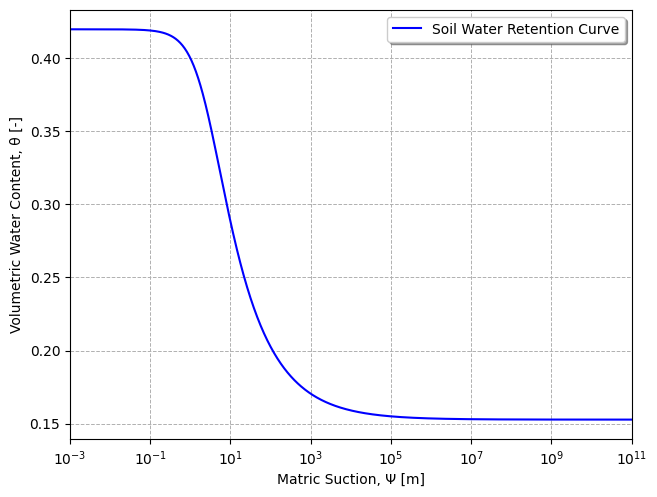

In [10]:
# In order to use the proposed PINN model, please provide the following soil characterization as input:
# DBD: Dry Bulk Density in kg/m³ (e.g., 1600 kg/m³)
# OCC: Organic Carbon Content as a decimal (e.g., 0.1 for 10%)
# SAND, SILT, CLAY: contents of sand, silt, and clay, each as a decimal (e.g., 0.34 for 34%)
# ➤ These three fractions must add up to 1.0 (i.e., SAND + SILT + CLAY = 1.0)
# Here is an example of usage:
single_prediction(DBD=1600, OCC=0.1, SAND=0.34, SILT=0.33, CLAY=0.33)